<a href="https://colab.research.google.com/github/akshatsinha0407/PythonColab/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
!pip install tensorflow-gpu


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> No available output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
ERROR: Failed to build 'tensorflow-gpu' when getting requirements to build wheel


In [51]:
pip install --upgrade pip setuptools wheel


In [52]:
pip install tensorflow-gpu


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> No available output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
ERROR: Failed to build 'tensorflow-gpu' when getting requirements to build wheel


In [53]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [54]:
!pip install tensorflow-gpu==2.12.0


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> No available output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
ERROR: Failed to build 'tensorflow-gpu' when getting requirements to build wheel


In [55]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [56]:
#import some basic liberary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [58]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [59]:
# Divide the data into dependent and independent features


In [60]:
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [61]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [62]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [63]:
#Feature engg

In [64]:
geography = pd.get_dummies(X['Geography'],drop_first=True) # drop true very useful

In [65]:
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [66]:
# concatinate variable vith data set

In [67]:
# drop gender and geo...

In [68]:
X =X.drop(['Geography' , 'Gender'], axis=1)

In [69]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [70]:
# concateinate

In [71]:
X = pd.concat([X,geography,gender],axis=1)

In [72]:
# Splitiing DS into T T S
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [73]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [74]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [75]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [76]:
X_train.shape

(8000, 11)

In [77]:
# Part 2 Let's Create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU,ELU , ReLU
from tensorflow.keras.layers import Dropout

In [78]:
# Ininitize the ANN
classifier = Sequential()
# Add the input Layer
classifier.add(Dense(units=11, activation='relu'))

In [79]:
# adding the first hidden layer
classifier.add(Dense(units=7, activation='relu'))

In [80]:
# adding the second hidden layer
classifier.add(Dense(units=6, activation='relu'))

In [81]:
# Adding the output layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [82]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [83]:
# for custom
import tensorflow as tf
opt=tf.keras.optimizers.Adam(learning_rate=0.01)

In [84]:
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


In [85]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33,batch_size=10,epochs=1000)

In [86]:
#  Early stopping - jab accray badna band kerde
# - google se code nikal lo

In [87]:
early_stopping =tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [91]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33,batch_size=10,epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7979 - loss: 0.4582 - val_accuracy: 0.8307 - val_loss: 0.3861
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8451 - loss: 0.3674 - val_accuracy: 0.8429 - val_loss: 0.3792
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8547 - loss: 0.3675 - val_accuracy: 0.8413 - val_loss: 0.3834


In [92]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

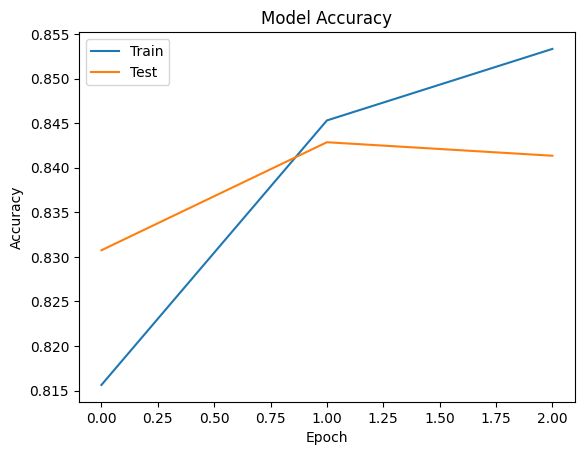

In [94]:
# graph me dek sakte hai ki jase hi gap badne laga vahi pe stopping ho gai
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [95]:
# for test data
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)
#

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step


In [96]:
# make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [97]:
cm

array([[1547,   48],
       [ 231,  174]])

In [98]:
# accuray
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

In [99]:
score


0.8605

In [102]:
# if i vant to see the vights
classifier.get_weights()

[array([[ 6.54921591e-01, -3.40331756e-02, -2.12809853e-02,
         -2.23110348e-01,  2.72314161e-01,  2.98382132e-03,
         -8.03695172e-02,  3.82657945e-02,  2.14864523e-03,
         -2.18875289e-01, -2.19526395e-01],
        [ 1.08745299e-01, -2.25847363e-01, -1.30593467e+00,
         -1.40241802e-01, -1.27947223e+00,  6.92722797e-02,
          2.68179446e-01, -1.72273922e+00, -3.14158916e-01,
         -8.65004599e-01,  5.56717396e-01],
        [ 1.68544473e-04,  2.59789854e-01, -5.12296081e-01,
          2.91277140e-01,  1.43187791e-01, -6.34648725e-02,
          3.17329943e-01, -3.76308441e-01, -4.19775918e-02,
          1.98273912e-01, -5.71187548e-02],
        [-5.57644129e-01,  4.78616953e-01, -5.83418608e-01,
         -5.48419058e-01,  3.43907833e-01,  3.66007894e-01,
          4.44181681e-01,  2.44173199e-01, -5.12079179e-01,
         -2.15786636e-01,  9.03177783e-02],
        [ 1.50255024e-01,  5.25629699e-01,  6.11024164e-03,
          6.83556080e-01, -4.37261581e-01,  